In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import itertools
import os

In [2]:
exps = ['exp1', 'exp2', 'exp3']
dfs = {}  # diccionario donde guardamos los DataFrames por experimento

for exp in exps:
    lista_dfs = []
    for generacion in range(45):
        ruta_archivo = f'resultados/{exp}/resultados_generacion_{generacion}.csv'
        if os.path.exists(ruta_archivo):
            datos = pd.read_csv(ruta_archivo)
            datos['generacion'] = generacion
            lista_dfs.append(datos)
        else:
            print(f'Archivo no encontrado: {ruta_archivo}')
            break
    
    # unir todos los de este experimento en un DataFrame
    dfs[exp] = pd.concat(lista_dfs, ignore_index=True)

# ahora accedés así:
df_exp1 = dfs['exp1']
df_exp2 = dfs['exp2']
df_exp3 = dfs['exp3']

def limpiar_valor(x):
    if pd.isna(x):
        return x  # deja los NaN como están
    x = str(x).strip()
    if x.startswith("[") and x.endswith("]"):
        x = x[1:-1]  # quita corchetes
    try:
        return float(x)
    except ValueError:
        return pd.NA  # si no se puede convertir

for col in ["beta", "gamma"]:
    df_exp2[col] = df_exp2[col].apply(limpiar_valor).astype(float)

# Gráficos del experimento 1

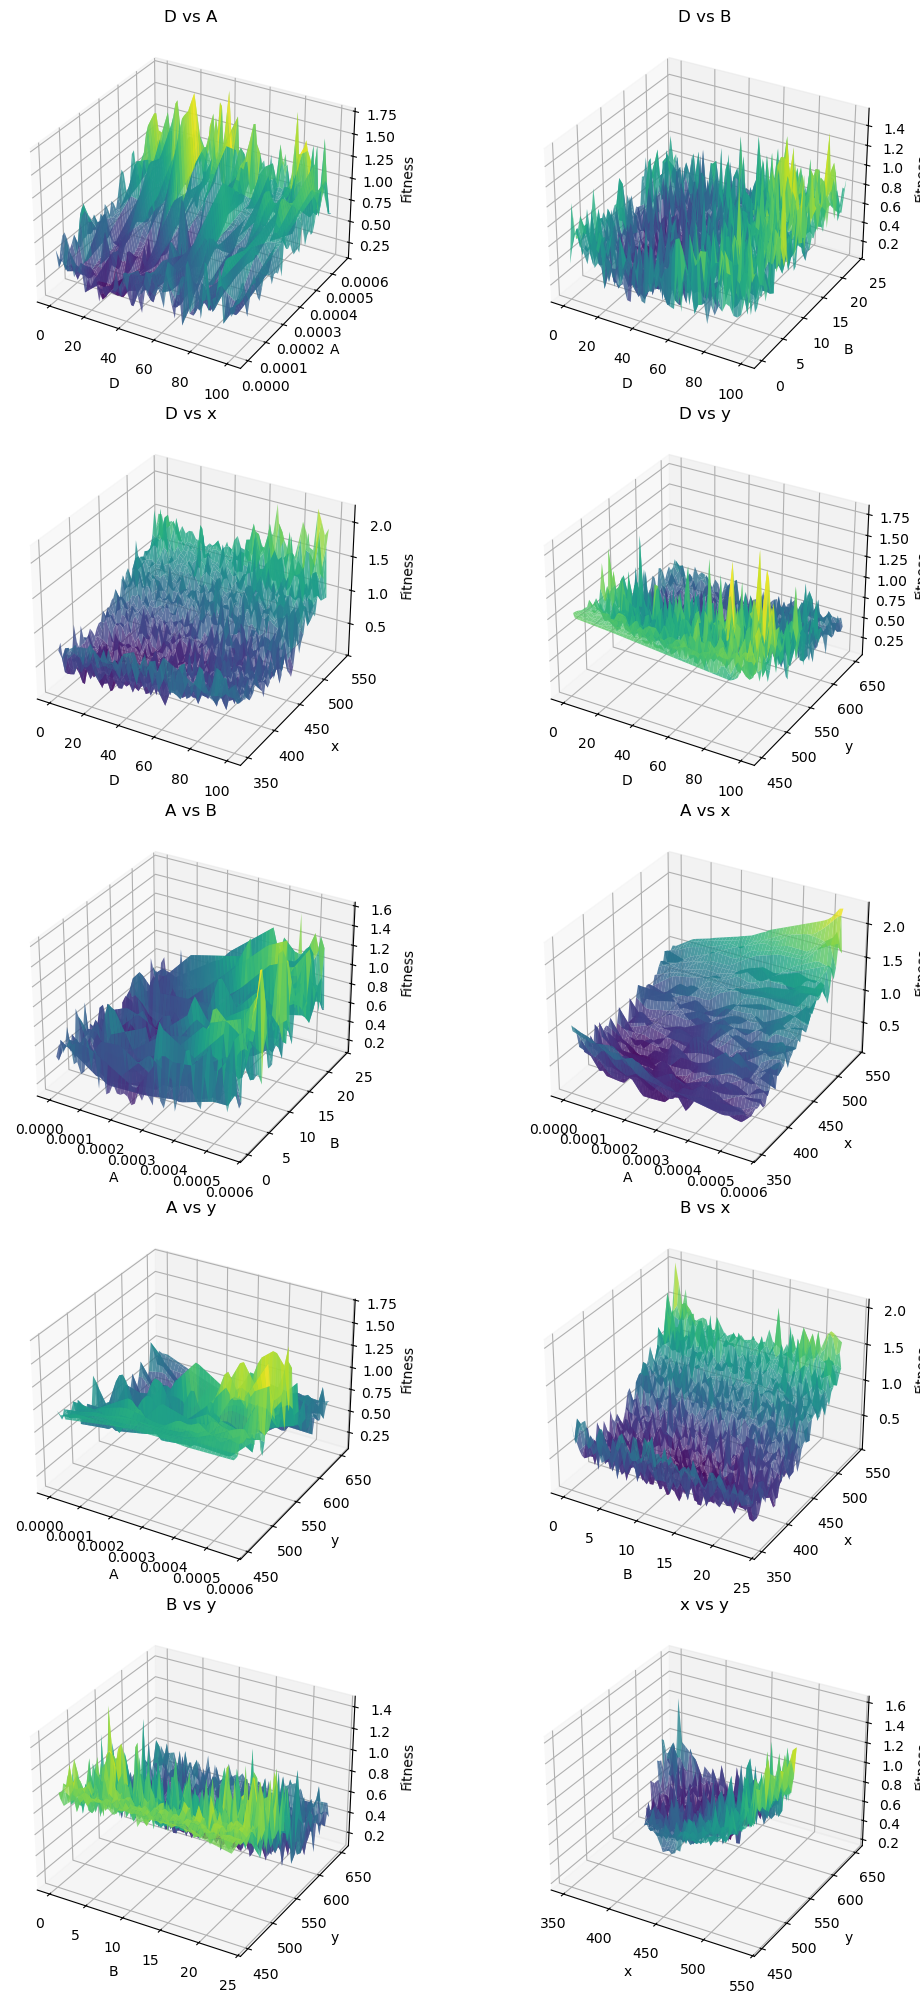

In [6]:
# Última generación
ultima_gen_exp1 = df_exp1["generacion"].max()
df_ultima_exp1 = df_exp1[df_exp1["generacion"] == ultima_gen_exp1].drop(columns=["generacion"])

parametros = ["D", "A", "B", "x", "y"]

# Todas las combinaciones de a 2 parámetros
combinaciones = list(itertools.combinations(parametros, 2))

fig, axes = plt.subplots(
    nrows=len(combinaciones)//2 + len(combinaciones)%2, 
    ncols=2, 
    figsize=(12, 20), 
    subplot_kw={"projection": "3d"}
)

axes = axes.flatten()

for i, (p1, p2) in enumerate(combinaciones):
    ax = axes[i]
    x = df_exp1[p1].values
    y = df_exp1[p2].values
    z = df_exp1["fitness"].values
    
    # Crear grilla
    xi = np.linspace(x.min(), x.max(), 50)
    yi = np.linspace(y.min(), y.max(), 50)
    Xi, Yi = np.meshgrid(xi, yi)
    
    # Interpolación
    Zi = griddata((x, y), z, (Xi, Yi), method="linear")
    
    # Superficie
    ax.plot_surface(Xi, Yi, Zi, cmap="viridis", alpha=0.8)
    # ax.scatter(x, y, z, c="red", s=5)  # puntos originales
    
    ax.set_xlabel(p1)
    ax.set_ylabel(p2)
    ax.set_zlabel("Fitness")
    ax.set_title(f"{p1} vs {p2}")

# Eliminar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("superficie_fitness.pdf", dpi=600, bbox_inches='tight')
plt.show()

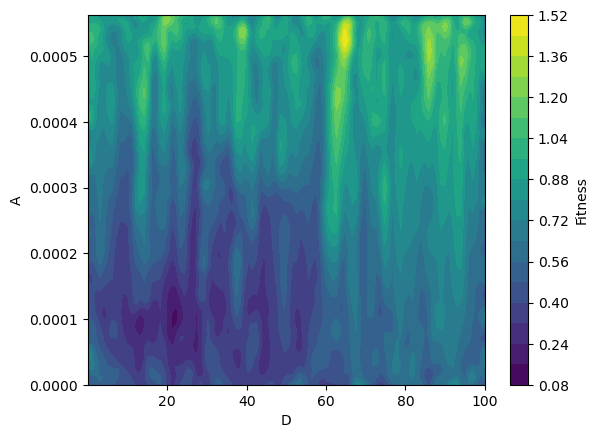

In [46]:
from scipy.ndimage import gaussian_filter

Zi_suave = gaussian_filter(Zi, sigma=1)  # probá sigma=1,2,3

plt.contourf(Xi, Yi, Zi_suave, levels=20, cmap="viridis")
plt.colorbar(label="Fitness")
plt.xlabel("D")
plt.ylabel("A")
plt.show()

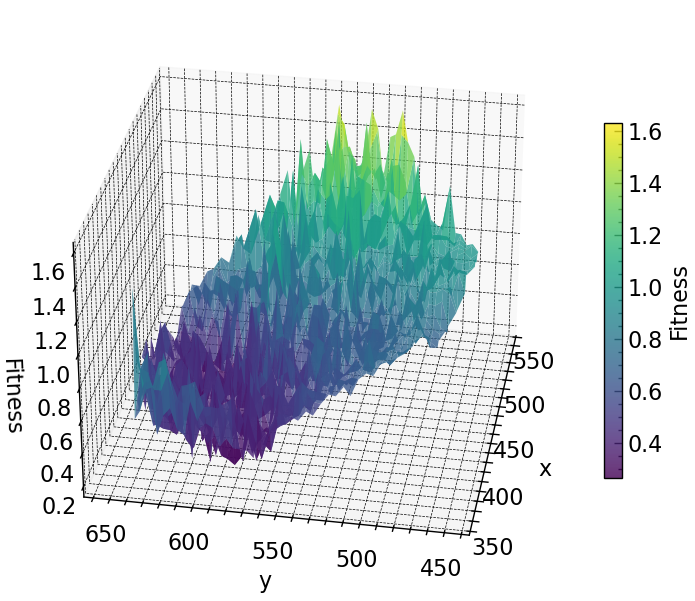

In [14]:
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

x = df_exp1["x"].values
y = df_exp1["y"].values
z = df_exp1["fitness"].values

# Crear grilla
xi = np.linspace(x.min(), x.max(), 50)
yi = np.linspace(y.min(), y.max(), 50)
Xi, Yi = np.meshgrid(xi, yi)

# Interpolación
Zi = griddata((x, y), z, (Xi, Yi), method="linear")

# Superficie
surf = ax.plot_surface(Xi, Yi, Zi, cmap="viridis", alpha=0.8)
# ax.scatter(x, y, z, c="red", s=5)  # puntos originales

ax.set_xlabel("x", labelpad=10)
ax.set_ylabel("y", labelpad=10)
ax.set_zlabel("Fitness", labelpad=10)

cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=19, pad=0.01)
cbar.set_label("Fitness")

ax.view_init(elev=30, azim=190)

plt.savefig("surf_x_y_exp1.pdf", dpi=600, bbox_inches="tight")
plt.show()

# Gráficos del experimento 2

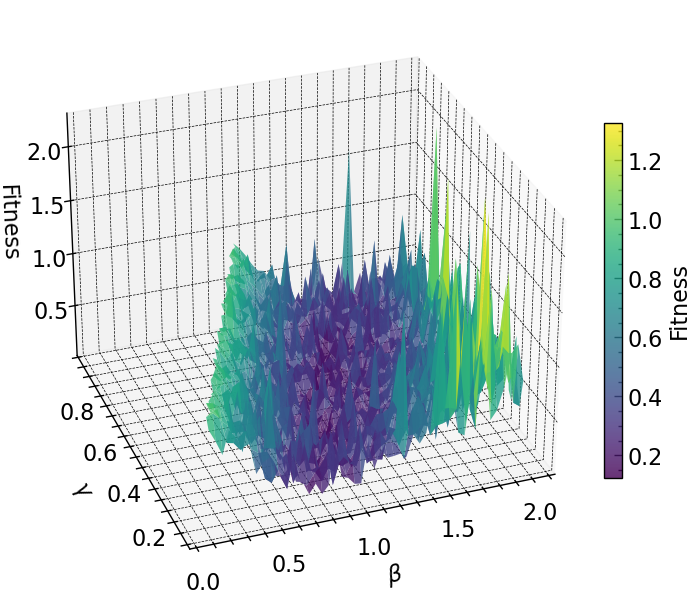

In [10]:
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

x = df_exp2["beta"].values
y = df_exp2["gamma"].values
z = df_exp2["fitness"].values

# Crear grilla
xi = np.linspace(x.min(), x.max(), 50)
yi = np.linspace(y.min(), y.max(), 50)
Xi, Yi = np.meshgrid(xi, yi)

# Interpolación
Zi = griddata((x, y), z, (Xi, Yi), method="linear")

# Superficie
surf = ax.plot_surface(Xi, Yi, Zi, cmap="viridis", alpha=0.8)
# ax.scatter(x, y, z, c="red", s=5)  # puntos originales

ax.set_xlabel(r"$\beta$", labelpad=10)
ax.set_ylabel(r"$\gamma$", labelpad=10)
ax.set_zlabel("Fitness", labelpad=10)

cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=19, pad=0.01)
cbar.set_label("Fitness")

ax.view_init(elev=30, azim=250)

plt.savefig("surf_beta_gamma_exp2.pdf", dpi=600, bbox_inches="tight")
plt.show()

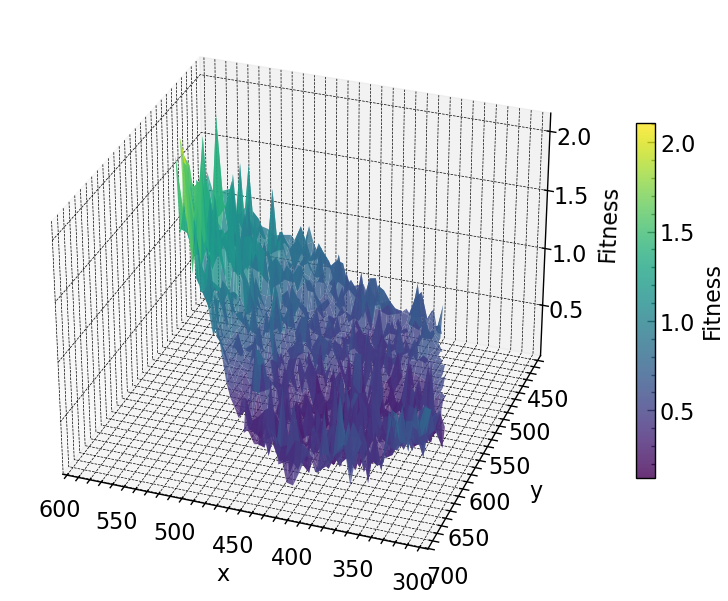

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

x = df_exp2["x"].values
y = df_exp2["y"].values
z = df_exp2["fitness"].values

# Crear grilla
xi = np.linspace(x.min(), x.max(), 50)
yi = np.linspace(y.min(), y.max(), 50)
Xi, Yi = np.meshgrid(xi, yi)

# Interpolación
Zi = griddata((x, y), z, (Xi, Yi), method="linear")

# Superficie
surf = ax.plot_surface(Xi, Yi, Zi, cmap="viridis", alpha=0.8)
# ax.scatter(x, y, z, c="red", s=5)  # puntos originales

ax.set_xlabel("x", labelpad=10)
ax.set_ylabel("y", labelpad=10)
ax.set_zlabel("Fitness", labelpad=10)

cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=19, pad=0.06)
cbar.set_label("Fitness")

ax.view_init(elev=30, azim=-250)

plt.savefig("surf_x_y_exp2.pdf", dpi=600, bbox_inches="tight")
plt.show()